In [44]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import pandas as pd 
import re
from keras.preprocessing.text import Tokenizer 
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
from attention import AttentionLayer
pd.set_option("display.max_colwidth", -1)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
reviews = pd.read_csv("Book.csv")
print(reviews.shape)
reviews.head()

(1, 1)


,text
0,A few months ago I had the opportunity to complete Andrew Ngs Machine Learning MOOC taught on Coursera It serves as a very good introduction for anyone who wants to venture into the world of AI ML But the catch this course is taught in Octave I always wondered how amazing this course could be if it were in Python I finally decided to re-take the course but only this time I would be completing the programming assignments in Python In these series of blog posts I plan to write about the Python version of the programming exercises used in the course Im doing this for a few reasons It will help anyone who wanted a Python version of the course that includes me as well It will hopefully benefit R users who are willing to learn about the Pythonic implementation of the algorithms they are already familiar with Pre-requisites Its highly reommended that first you watch the week 1 video lectures Should have basic familiarity with the Python ecosystem In this section we will look at the simplest Machine Learning algorithms First some context on the problem statement Here we will implement linear regrssion with one variable to predict profits for a food tuck Suppose you are the CEO of a restaurant franchise ad are considering different cities for opening a new outlet The chain already has trucks in various cities and you have data for profits and populations from the cities The file ex1data txt available under week 2s assignment material contains the dataset for our linear regression exercise The first column is the population of a city and the second column is the profit of a food truck ithat city A negative value for profit indicates a loss


In [6]:
# Check for any nulls values
reviews.isnull().sum()

text    0
dtype: int64

In [7]:
# let's inspect some reviews
for i in range(1):
    print("Review: ",i)
    print(reviews.text)
    print('-'*80)
    print(reviews.text)
    print()

Review:  0
0    A few months ago I had the opportunity to complete Andrew Ngs Machine Learning MOOC taught on Coursera It serves as a very good introduction for anyone who wants to venture into the world of AI ML But the catch this course is taught in Octave I always wondered how amazing this course could be if it were in Python I finally decided to re-take the course but only this time I would be completing the programming assignments in Python In these series of blog posts I plan to write about the Python version of the programming exercises used in the course Im doing this for a few reasons It will help anyone who wanted a Python version of the course that includes me as well It will hopefully benefit R users who are willing to learn about the Pythonic implementation of the algorithms they are already familiar with Pre-requisites Its highly reommended that first you watch the week 1 video lectures Should have basic familiarity with the Python ecosystem In this section we will look a

In [8]:

cleaned_text = []
for text in reviews['text']:
    cleaned_text.append(text)
print("Texts are complete.")

Texts are complete.


In [9]:
# let's inspect some clean reviews
for i in range(1):
    print("Review: ",i+1)
    print('-'*1)
    print(cleaned_text[i])
    print()


Review:  1
-
A few months ago I had the opportunity to complete Andrew Ngs Machine Learning MOOC taught on Coursera It serves as a very good introduction for anyone who wants to venture into the world of AI ML But the catch this course is taught in Octave I always wondered how amazing this course could be if it were in Python I finally decided to re-take the course but only this time I would be completing the programming assignments in Python In these series of blog posts I plan to write about the Python version of the programming exercises used in the course Im doing this for a few reasons It will help anyone who wanted a Python version of the course that includes me as well It will hopefully benefit R users who are willing to learn about the Pythonic implementation of the algorithms they are already familiar with Pre-requisites Its highly reommended that first you watch the week 1 video lectures Should have basic familiarity with the Python ecosystem In this section we will look at t

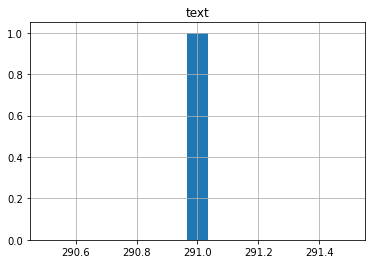

In [10]:
import matplotlib.pyplot as plt

text_word_count = []


for i in cleaned_text:
    text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text': text_word_count})
length_df.hist(bins=15)
plt.show()

In [11]:
count = 0
for i in cleaned_text:
    if(len(i.split())<=291):
        count += 1
print(count/len(cleaned_text))

1.0


In [16]:

max_text_len=250

cleaned_text = np.array(cleaned_text)


short_text=[]


for i in range(len(cleaned_text)):
    
    if(len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_headlines.append(cleaned_headlines[i])

df=pd.DataFrame({'text':short_text})
x,y=text,text
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(x,y,
train_size=0.5,
test_size=0.5,
random_state=123)
clf = linear_model.LogisticRegression() 
clf.fit(X_train, y_train)

NameError: ignored

In [13]:
df.head()

,text


In [14]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

x_voc

% of rare words in vocabulary: 22.22222222222222
Total Coverage of rare words: 1.0159651669085632


22

In [17]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

x_voc

% of rare words in vocabulary: 22.22222222222222
Total Coverage of rare words: 1.0159651669085632


22

In [24]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length


#size of vocabulary
y_voc  =   y_tokenizer.num_words +1



% of rare words in vocabulary: 29.629629629629626
Total Coverage of rare words: 2.1770682148040637


In [25]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [26]:

from keras import backend as K 
K.clear_session()

latent_dim = 320
embedding_dim=220

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.3,recurrent_dropout=0.1)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 250, 220)     4840        input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 250, 320), ( 692480      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [66]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
history=model.fit([x_tr,y_tr[:,:-1]],
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,
epochs=10,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]],
y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

IndexError: ignored

In [31]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: ignored

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_headlines_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString